In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

np.random.seed(42)

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## <u>1.    Load the data</u>

In [43]:
data = pd.read_csv("heart.csv")
data.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,ca,output
0,63,male,asymptomatic,145,233,True,0,150,no,2.3,downsloping,0,high
1,37,male,non-anginal pain,130,250,False,1,187,no,3.5,downsloping,0,high
2,41,female,atypical angina,130,204,False,0,172,no,1.4,upsloping,0,high
3,56,male,atypical angina,120,236,False,1,178,no,0.8,upsloping,0,high
4,57,female,typical angina,120,354,False,1,163,yes,0.6,upsloping,0,high



## <u>2.    Take a quick look at the data such as using head, describe, info</u>

In [44]:
data.describe()

,age,trtbps,chol,restecg,thalachh,oldpeak,ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,0.528053,149.646865,1.039604,0.729373
std,9.082101,17.538143,51.830751,0.525860,22.905161,1.161075,1.022606
min,29.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,0.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,1.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,274.500000,1.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,2.000000,202.000000,6.200000,4.000000


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    bool   
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    object 
 11  ca        303 non-null    int64  
 12  output    303 non-null    object 
dtypes: bool(1), float64(1), int64(6), object(5)
memory usage: 28.8+ KB


Number of people having sex as Male are 207 and Number of people having sex as Female are 96


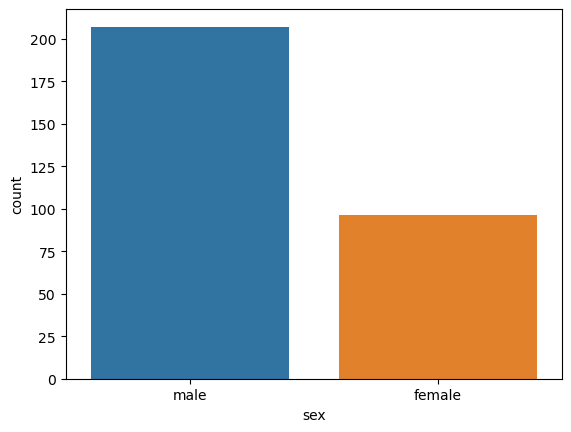

In [46]:
x=(data['sex'].value_counts())
print(f'Number of people having sex as Male are {x[0]} and Number of people having sex as Female are {x[1]}')
p = sns.countplot(data=data, x="sex")
#plt.show()

typical angina      143
non-anginal pain     87
atypical angina      50
asymptomatic         23
Name: cp, dtype: int64


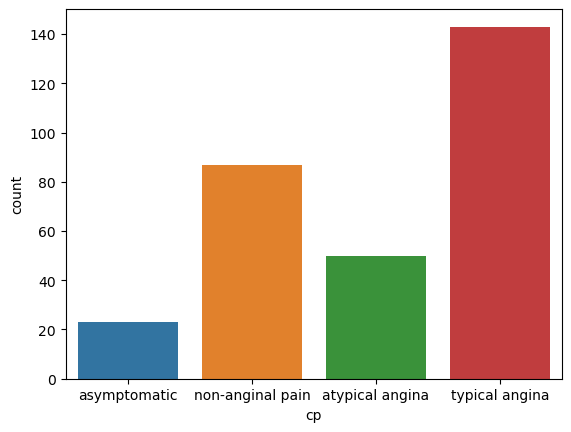

In [47]:
vals=(data['cp'].value_counts())
print(vals)
p = sns.countplot(data=data, x="cp")
plt.show()

- It can be observed people have chest pain of type 'Typical Angina' is the highest.
- It can be observed people have chest pain of type 'Asymptomatic' is the lowest
- It can also be observed people with chest pain of type 'Typical Angina' is almost 50% of all the people

In [48]:
cat_attribs = ['sex', 'cp', 'exng', 'fbs','restecg','slp']
num_attribs = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'ca']

## <u>3.    Split your data into training and test set (no data snooping!)</u>

In [49]:
train, test = train_test_split(data, test_size=0.2, random_state=42)
train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,ca,output
132,42,male,atypical angina,120,295,False,1,162,no,0.0,upsloping,0,high
202,58,male,typical angina,150,270,False,0,111,yes,0.8,upsloping,0,low
196,46,male,non-anginal pain,150,231,False,1,147,no,3.6,flat,0,low
75,55,female,atypical angina,135,250,False,0,161,no,1.4,flat,0,high
176,60,male,typical angina,117,230,True,1,160,yes,1.4,upsloping,2,low


## <u>4.    Explore data and visualize the data to gain insights</u>

In [50]:
pd.crosstab([train['sex']], train['output'])

output,high,low
sex,,
female,63,20
male,70,89


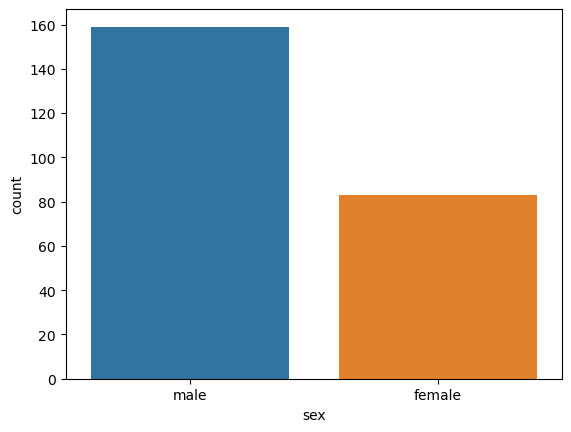

In [51]:
#plt.hist(data=train, x="sex", bins=2, rwidth=0.9)
p = sns.countplot(data=train, x="sex")
plt.show()

<Figure size 1000x1000 with 0 Axes>

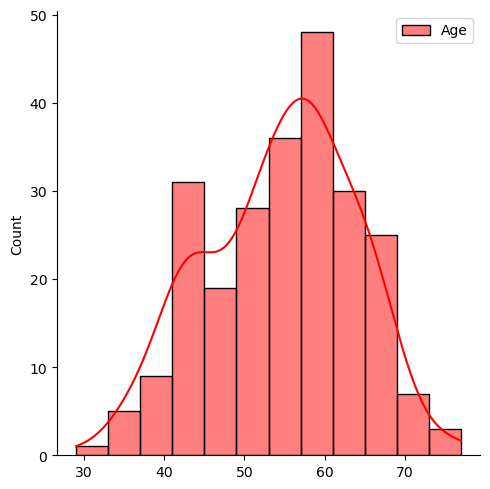

In [52]:
plt.figure(figsize=(10,10))
sns.displot(train['age'].values, color="red", label="Age", kde= True)
plt.legend()

Density distribution is highest for age group 55 to 60

In [53]:
train.info()
# any missing values to report

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 132 to 102
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       242 non-null    int64  
 1   sex       242 non-null    object 
 2   cp        242 non-null    object 
 3   trtbps    242 non-null    int64  
 4   chol      242 non-null    int64  
 5   fbs       242 non-null    bool   
 6   restecg   242 non-null    int64  
 7   thalachh  242 non-null    int64  
 8   exng      242 non-null    object 
 9   oldpeak   242 non-null    float64
 10  slp       242 non-null    object 
 11  ca        242 non-null    int64  
 12  output    242 non-null    object 
dtypes: bool(1), float64(1), int64(6), object(5)
memory usage: 24.8+ KB


In [54]:
train['output'].value_counts()

high    133
low     109
Name: output, dtype: int64

<Axes: xlabel='output', ylabel='chol'>

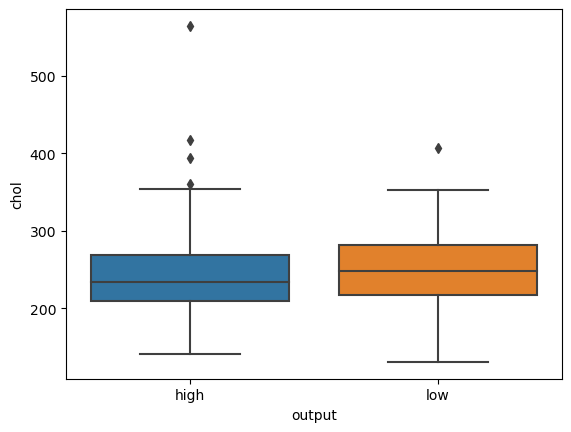

In [55]:
sns.boxplot(x=train['output'], y=train[num_attribs[2]])

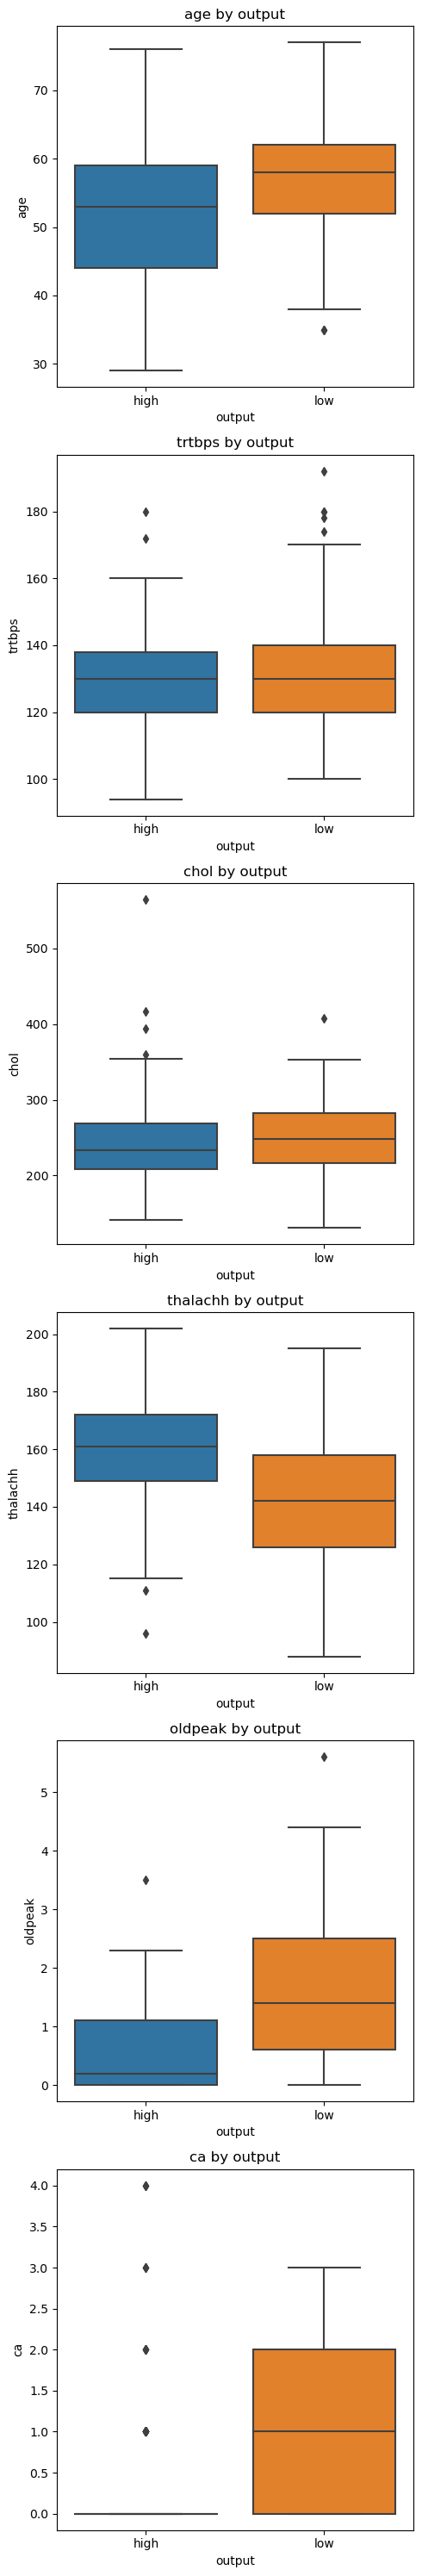

In [56]:
n_cat = 1
n_cont = len(num_attribs)

fig, axes = plt.subplots(nrows=n_cont, ncols=n_cat, figsize=(5*n_cat, 5*n_cont), sharex=False, sharey=False)

for i, cont_col in enumerate(num_attribs):
    sns.boxplot(x=train['output'], y=cont_col, data=train, ax=axes[i])
    axes[i].set_title(f'{cont_col} by {"output"}')

plt.tight_layout()
plt.show()

In [57]:
# Experiment with Attribute Combinations

## <u>5.    Data Preprocessing</u>
	a.    Data Cleaning
	b.    Handling Text and Categorical Data (e.g., get_dummies)
	c.    Feature Scaling (standardize continuous values)

In [58]:
heart = train.drop("output", axis=1) #X
heart_labels = train["output"].copy() #y

In [59]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

cat_attribs = ['sex', 'cp', 'exng', 'fbs','restecg','slp']
num_attribs = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'ca']

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"), 
    # you may add log transformation if needed
    StandardScaler()
)

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [60]:
heart_prepared = preprocessing.fit_transform(heart)
heart_prepared

array([[-1.35679832, -0.61685555,  0.91403366, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.38508599,  1.1694912 ,  0.43952674, ...,  0.        ,
         0.        ,  1.        ],
       [-0.92132724,  1.1694912 , -0.30070405, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.58263146,  1.76494012, -0.24376322, ...,  0.        ,
         1.        ,  0.        ],
       [-0.92132724, -0.61685555,  0.04094093, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.92942484,  0.57404228, -0.98399402, ...,  0.        ,
         0.        ,  1.        ]])

In [61]:
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['age', 'trtbps', 'chol', 'thalachh',
                                  'oldpeak', 'ca']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['sex', 'cp', 'exng', 'fbs', 'restecg',
                                  'slp'])])

In [62]:
#preprocessing.get_feature_names_out()

In [63]:
from sklearn.preprocessing import LabelEncoder
lencoder = LabelEncoder()
lencoder.fit(heart_labels)
heart_labels = lencoder.transform(heart_labels)
heart_labels

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0])

In [64]:
lencoder.classes_

array(['high', 'low'], dtype=object)

## <u>6.    Modelling</u>
	a.    Apply few algorithms/models
	b.    Select few promising ones by evaluating them using validation set

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

tree_clf = make_pipeline(preprocessing, DecisionTreeClassifier(random_state=42))
tree_clf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trtbps', 'chol',
                                                   'thalachh', 'oldpeak',
                                                   'ca']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'exng', 'fbs',
                                                   'restecg', 'slp'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [66]:
tree_acc = cross_val_score(tree_clf, 
                              heart, heart_labels,
                              scoring="accuracy", 
                              cv=10)

tree_acc

array([0.76      , 0.8       , 0.79166667, 0.79166667, 0.66666667,
       0.54166667, 0.625     , 0.625     , 0.875     , 0.66666667])

In [67]:
pd.Series(tree_acc).describe()

count    10.000000
mean      0.714333
std       0.104093
min       0.541667
25%       0.635417
50%       0.713333
75%       0.791667
max       0.875000
dtype: float64

In [68]:
from sklearn.model_selection import cross_val_score

log_reg = make_pipeline(preprocessing, LogisticRegression(random_state=42))
log_reg

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trtbps', 'chol',
                                                   'thalachh', 'oldpeak',
                                                   'ca']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'exng', 'fbs',
                                                   'restecg', 'slp'])])),
                ('logisticregression', LogisticRegression(random_state=42))])

In [69]:
log_scores = cross_val_score(log_reg, 
                            heart, heart_labels,
                            cv=10)
print(log_scores)
print(log_scores.mean(), log_scores.std())

[0.8        0.8        0.875      0.83333333 0.83333333 0.70833333
 0.79166667 0.91666667 0.75       0.79166667]
0.8099999999999999 0.05612486080160911


## <u>7.    Fine tune the short-listed models</u>

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

dt_full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("decision_tree", DecisionTreeClassifier(random_state=42)),
])

dt_full_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trtbps', 'chol',
                                                   'thalachh', 'oldpeak',
                                                   'ca']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'exng', 'fbs',
                                                   'restecg', 'slp'])])),
                ('decision_tree', DecisionTreeClassifier(random_state=42))])

In [71]:
param_grid = [
    {'decision_tree__max_depth': [1, 2, 3, 4, 6, 8],
     'decision_tree__criterion': ['gini', 'entropy']}
]

grid_tree = GridSearchCV(dt_full_pipeline, param_grid, cv=2,
                           scoring='accuracy')

grid_tree.fit(heart, heart_labels)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'trtbps',
                                                                          'chol',
                                                                          'thalachh',
                                                                          'oldpeak',
                                                                          'ca']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['sex',
                                                                          'cp',
                                                                          'exng',
                                                                          'fbs',
                                                                          'restecg',
                                                                          'slp'])])),
                                       ('decision_tree',
                                        DecisionTreeClassifier(random_state=42))]),
             param_grid=[{'decision_tree__criterion': ['gini', 'entropy'],
                          'decision_tree__max_depth': [1, 2, 3, 4, 6, 8]}],
             scoring='accuracy')

In [72]:
print("tuned hpyerparameters :(best parameters) ",grid_tree.best_params_)
print("accuracy :",grid_tree.best_score_)

tuned hpyerparameters :(best parameters)  {'decision_tree__criterion': 'gini', 'decision_tree__max_depth': 6}
accuracy : 0.7272727272727273


In [73]:
log_full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("log_reg", LogisticRegression(max_iter=2000)),
])

log_full_pipeline

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trtbps', 'chol',
                                                   'thalachh', 'oldpeak',
                                                   'ca']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'exng', 'fbs',
                                                   'restecg', 'slp'])])),
                ('log_reg', LogisticRegression(max_iter=2000))])

In [74]:
param_grid = [
    {'log_reg__C': [0.01, 0.1, 1]}
]

grid_log = GridSearchCV(log_full_pipeline, param_grid, cv=2,
                           scoring='accuracy')

grid_log.fit(heart, heart_labels)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'trtbps',
                                                                          'chol',
                                                                          'thalachh',
                                                                          'oldpeak',
                                                                          'ca']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['sex',
                                                                          'cp',
                                                                          'exng',
                                                                          'fbs',
                                                                          'restecg',
                                                                          'slp'])])),
                                       ('log_reg',
                                        LogisticRegression(max_iter=2000))]),
             param_grid=[{'log_reg__C': [0.01, 0.1, 1]}], scoring='accuracy')

In [75]:
print("tuned hpyerparameters :(best parameters) ",grid_log.best_params_)
print("accuracy :",grid_log.best_score_)

tuned hpyerparameters :(best parameters)  {'log_reg__C': 0.1}
accuracy : 0.78099173553719


In [76]:
# we can apply ensemble learning to make a better classifier
log_final_model = grid_log.best_estimator_ # includes preprocessing

In [77]:
log_final_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trtbps', 'chol',
                                                   'thalachh', 'oldpeak',
                                                   'ca']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'exng', 'fbs',
                                                   'restecg', 'slp'])])),
                ('log_reg', LogisticRegression(C=0.1, max_iter=2000))])

<br/>
<br/>

## <u>8.    Evaluate Your System on the Test Set</u>

In [78]:
from sklearn.metrics import accuracy_score

X_test = test.drop("output", axis=1)
y_test = test["output"].copy()
y_test = lencoder.transform(y_test)

#without pipeline, you need to ensure that you apply data preprocessing into your test set

final_predictions = log_final_model.predict(X_test)

final_accuracy = accuracy_score(y_test, final_predictions)
final_accuracy #test score

0.8852459016393442